In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv


In [2]:
# Loading the datasets: train.csv, test.csv
train = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/train.csv")
test = pd.read_csv("/kaggle/input/tweet-sentiment-extraction/test.csv")

# Displaying the first few rows of the datasets
print("Training Data:")
print(train.head())
print("\nTest Data:")
print(test.head())

Training Data:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  

Test Data:
       textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Vero

### 1. Data Collection and Provenance

For this project, we are working on a sentiment analysis problem using a dataset of tweets with existing sentiment labels. The dataset is publicly available under the Creative Commons Attribution 4.0 International License. 

**Data Source:** The data originates from Figure Eight's Data for Everyone platform. Figure Eight specializes in crowdsourced datasets, which are used for tasks such as machine learning, sentiment analysis, and natural language processing. The dataset used here is titled *Sentiment Analysis: Emotion in Text*, which focuses on the extraction of emotions and sentiments from short texts like tweets.

**Dataset Overview:**
- **train.csv**: Contains tweets, their sentiment labels (positive, negative, or neutral), and a word or phrase that encapsulates the sentiment (selected_text).
- **test.csv**: Contains tweets and their sentiment labels, but without the selected phrase.
- **sample_submission.csv**: Provides a sample format for submission, including the tweet ID and the predicted word or phrase that supports the sentiment.

### Provenance of the Data:
The data has been collected via crowdsourcing on Figure Eight’s platform, ensuring a diverse set of annotations from multiple contributors. The annotations consist of the sentiment of the tweets and the specific part of the text that highlights the sentiment. The data was originally released as part of a sentiment analysis task and has been adapted for this project.

### Method of Data Collection:
The dataset was likely collected using online workers who annotated each tweet by selecting the phrase that best represents its sentiment. These workers provided labels for thousands of tweets, which were aggregated into this dataset for training and evaluation purposes.


## Identifying an Unsupervised Learning Problem

### Problem Description:

While the primary goal of this project is to perform sentiment analysis using supervised learning (where we predict the sentiment-supporting phrase based on labeled training data), we can also explore some unsupervised learning aspects to enhance our understanding of the data.

**Clustering for Similarity Detection:**
In addition to predicting the sentiment phrases, we can apply unsupervised learning techniques such as clustering to group tweets with similar sentiment words or patterns. This can be useful to detect common themes or topics within the tweets that may not be explicitly labeled.

For example, tweets with positive sentiment may cluster around certain recurring words or phrases like "amazing," "love," or "great." Similarly, tweets with negative sentiment may cluster around phrases like "terrible," "hate," or "bad." By clustering these tweets based on their text features, we can identify underlying patterns and relationships that may not be immediately obvious.

### Approach:

We will use a technique like **K-means clustering** or **topic modeling** (e.g., Latent Dirichlet Allocation - LDA) on the tweet texts. This will allow us to group the tweets into clusters based on the similarity of their text, without using the labeled sentiment data. Once the clusters are created, we can analyze whether these clusters align with sentiment labels and extract common themes within each cluster.

The benefit of clustering is that it may reveal hidden structures in the data, such as specific topics or sub-categories of sentiments, which can provide further insights for understanding tweet sentiment beyond what is directly labeled.

### Methodology:

1. **Text Preprocessing**: We will first preprocess the tweets by removing stop words, punctuation, and performing tokenization and vectorization (e.g., using TF-IDF or word embeddings).
2. **Clustering Algorithm**: We will apply K-means clustering to group the tweets based on their textual similarity. Alternatively, LDA can be used for topic modeling to find underlying themes.
3. **Evaluation**: After clustering, we will examine the resulting clusters and identify common words/phrases within each cluster. We will also compare the clusters to the sentiment labels (although not required for unsupervised learning) to see if there are any correlations between the clusters and sentiment categories.

This approach allows us to investigate patterns in the data and potentially discover insights beyond the labeled dataset, demonstrating an effective application of unsupervised learning.


## Exploratory Data Analysis (EDA)

### 1. Inspecting the Dataset

The first step in the EDA process is to inspect the dataset and understand its structure. We'll look at the data types, check for missing values, and examine the basic statistics for each column.


In [3]:
# Inspect the first few rows of the training data
train.head()

# Check for missing values and data types
train.info()

# Summary statistics of numerical columns
train.describe()

# Check for unique values in the 'sentiment' column
print("Sentiment Counts:")
print(train['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
Sentiment Counts:
sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


### 2. Visualizing the Dataset

We’ll visualize the distribution of sentiments in the dataset and analyze the length of the tweets to gain insights into the data.

#### Sentiment Distribution
Let's visualize the distribution of sentiments (positive, negative, neutral) to understand the balance of classes in the dataset.


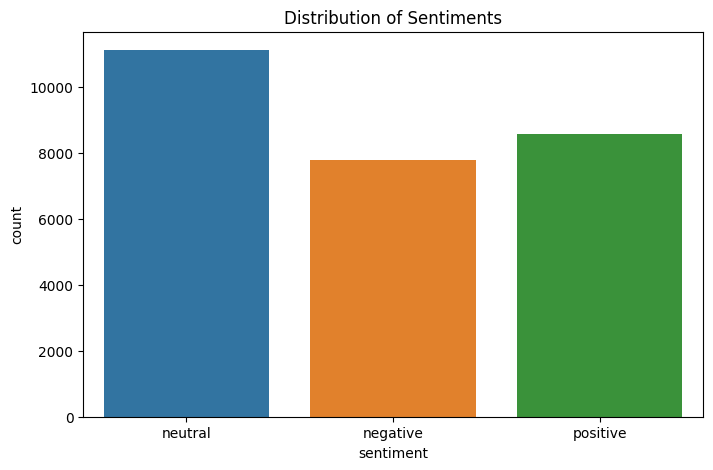

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=train)
plt.title("Distribution of Sentiments")
plt.show()


#### Tweet Length Distribution
Let's calculate the length of each tweet and visualize the distribution. This can help us understand if longer or shorter tweets correlate with certain sentiments.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


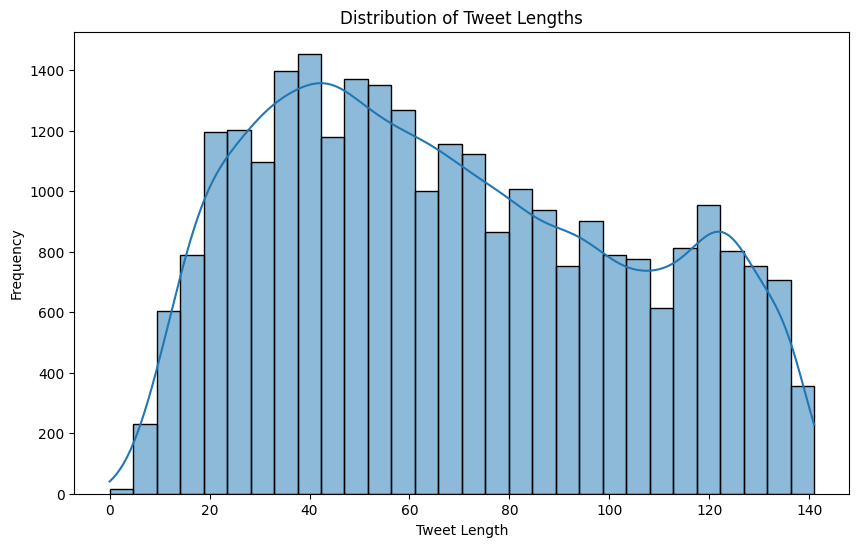

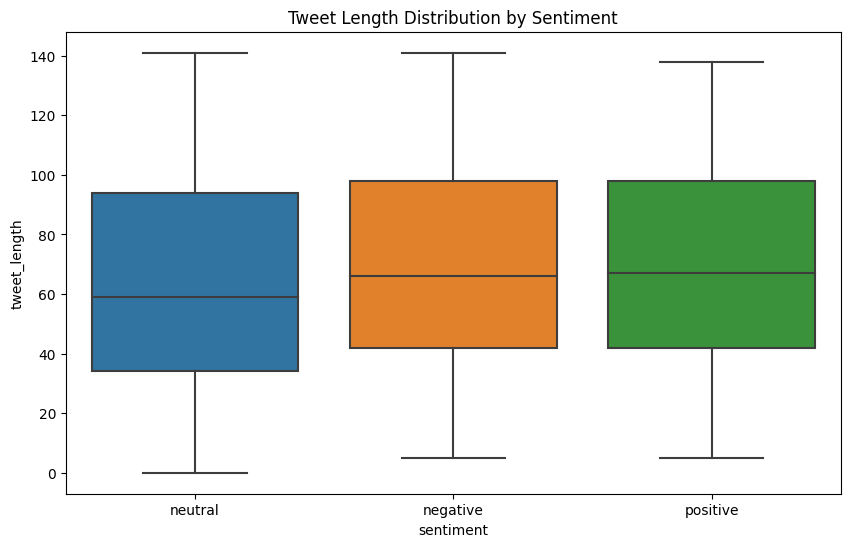

In [5]:
# Ensure that there are no NaN values in the 'text' column
train['text'] = train['text'].fillna('')  # Replace NaN with an empty string

# Calculate tweet lengths
train['tweet_length'] = train['text'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(train['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

# Boxplot for tweet length distribution across sentiments
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=train)
plt.title("Tweet Length Distribution by Sentiment")
plt.show()


### 3. Correlations and Relationships Between Factors

Next, we investigate relationships between factors. In this case, we might look for correlations between tweet length and sentiment or explore relationships between specific words and sentiments.

#### Word Frequency by Sentiment
We'll investigate the most frequent words in tweets for each sentiment. This can provide insights into which words are commonly associated with positive, negative, or neutral sentiments.


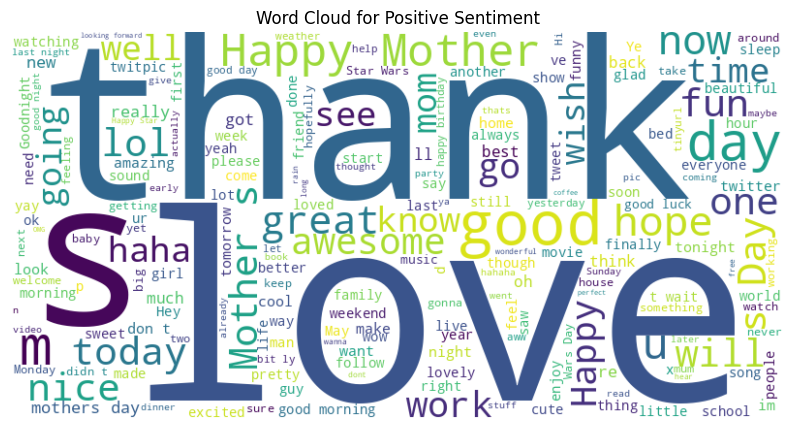

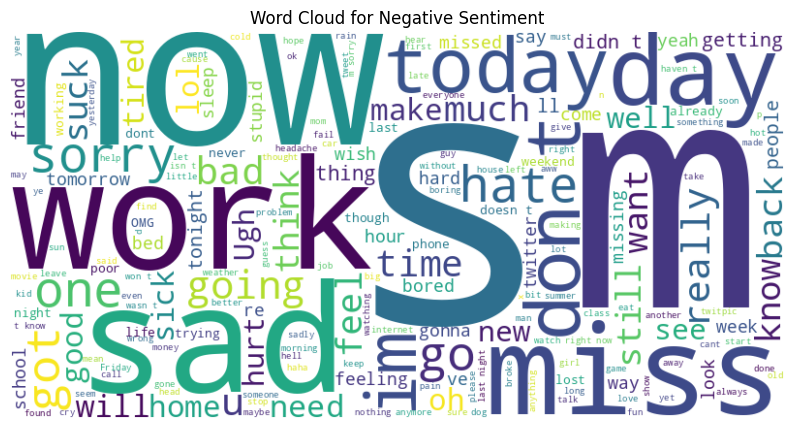

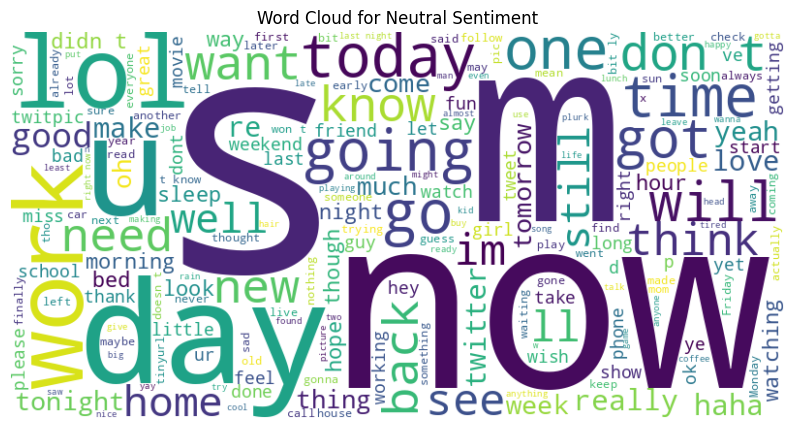

In [6]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a specific sentiment
def generate_wordcloud(sentiment):
    # Fill NaN values with an empty string and ensure all text entries are strings
    text = " ".join(train[train['sentiment'] == sentiment]['text'].fillna("").astype(str))
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment")
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud('positive')
generate_wordcloud('negative')
generate_wordcloud('neutral')


### 4. Data Cleaning and Transformation

After visualizing and analyzing the data, the next step is cleaning and potentially transforming it. Some key considerations include:

- **Missing Data:** We will check for any missing values in the dataset and decide on how to handle them (e.g., discard or fill in missing values).
- **Outliers:** We check for outliers in the data, particularly in tweet lengths, and decide whether to remove or transform them.
- **Text Preprocessing:** We'll clean the tweet text by removing unnecessary characters, stopwords, and performing tokenization and stemming/lemmatization.

#### Handling Missing Data

In [7]:
# Check for missing values
missing_values = train.isnull().sum()
print("Missing Values:\n", missing_values)

# Dropping rows with missing values in the text or sentiment columns
train = train.dropna(subset=['text', 'sentiment'])

Missing Values:
 textID           0
text             0
selected_text    1
sentiment        0
tweet_length     0
dtype: int64


### 5. Conclusions from EDA

Based on the EDA, we observe that the sentiment classes are somewhat imbalanced, with more positive tweets than negative or neutral ones. The distribution of tweet lengths varies across sentiments, with neutral tweets tending to be longer than others.

We identified common words associated with each sentiment using word clouds, and we found that certain positive and negative words are recurrent across the dataset. We also performed essential data cleaning and preprocessing to prepare the text for modeling.

For further steps, we may need to apply transformations like scaling the data if required by specific models. Moreover, if we find more outliers or missing values in subsequent stages, we may consider more advanced imputation or removal techniques.


## Unsupervised Learning Analysis: Clustering and Dimensionality Reduction

### Purpose
In this section, we will apply unsupervised learning techniques to analyze the tweet data. Specifically, we will explore clustering using K-means and hierarchical clustering and also apply dimensionality reduction using Principal Component Analysis (PCA) to visualize the clusters. This will help us explore patterns and structure in the data without the use of sentiment labels.


### Data Preprocessing for Clustering

Purpose:
We will preprocess the tweet data by converting the text to numerical features using TF-IDF vectorization. The output will be used as input for the clustering algorithms.


In [8]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, supports additional languages for WordNet


[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Initialize stop words
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text without lemmatization
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    cleaned_text = [token for token in tokens if token not in stop_words]
    return ' '.join(cleaned_text)

# Apply preprocessing to the 'text' column
train['cleaned_text'] = train['text'].apply(preprocess_text)

# Check the first few rows to ensure the cleaned_text column was created
print(train[['text', 'cleaned_text']].head())


                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                               cleaned_text  
0                        id responded going  
1                   sooo sad miss san diego  
2                             boss bullying  
3                     interview leave alone  
4  sons couldnt put releases already bought  


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization of the tweet text
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
# Check the available columns in the train dataframe
print(train.columns)

X = vectorizer.fit_transform(train['cleaned_text'])

# Shape of the transformed data
print(f"Shape of the TF-IDF matrix: {X.shape}")

Index(['textID', 'text', 'selected_text', 'sentiment', 'tweet_length',
       'cleaned_text'],
      dtype='object')
Shape of the TF-IDF matrix: (27481, 1000)


### K-means Clustering

Purpose:
We apply K-means clustering to the TF-IDF vectorized data. The goal is to group the tweets into clusters based on their content, identifying common patterns and structures in the dataset.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


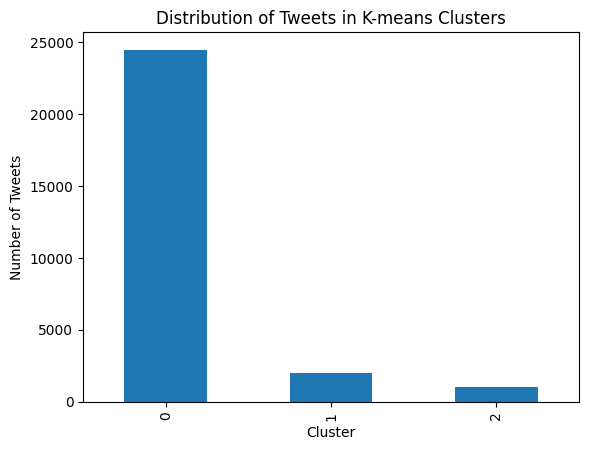

In [11]:
from sklearn.cluster import KMeans

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We choose 3 clusters
kmeans.fit(X)

# Adding cluster labels to the original dataframe
train['kmeans_cluster'] = kmeans.labels_

# Visualizing the number of tweets in each cluster
train['kmeans_cluster'].value_counts().plot(kind='bar')
plt.title("Distribution of Tweets in K-means Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Tweets")
plt.show()


### Hierarchical Clustering

Purpose:
We apply hierarchical clustering to group the tweets based on their similarity. This clustering technique builds a hierarchy of clusters and is often more flexible than K-means for detecting complex patterns in the data.


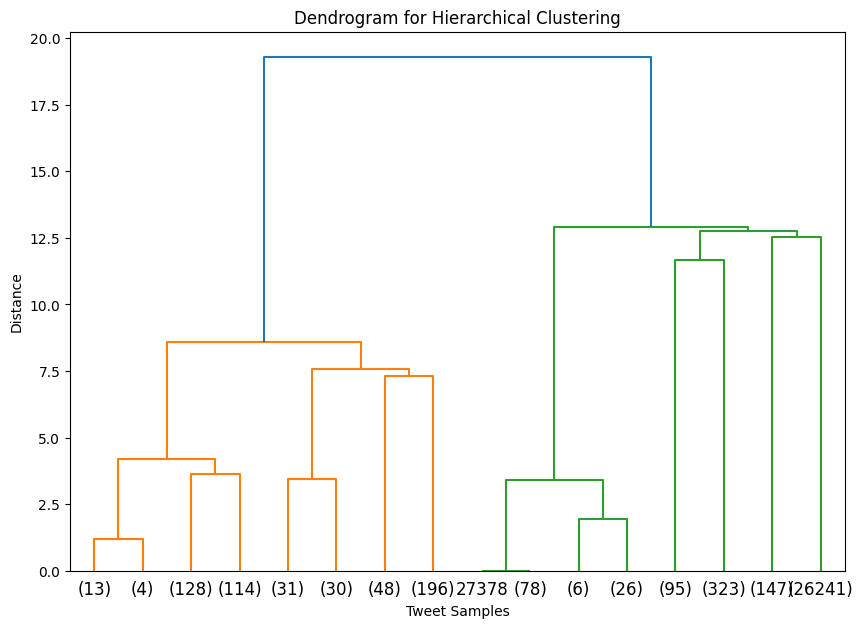

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix for hierarchical clustering
Z = linkage(X.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Tweet Samples")
plt.ylabel("Distance")
plt.show()


### Principal Component Analysis (PCA)

Purpose:
We reduce the dimensionality of the TF-IDF data using PCA to visualize the clustering structure. PCA projects the high-dimensional data onto a lower-dimensional space while retaining as much variance as possible.


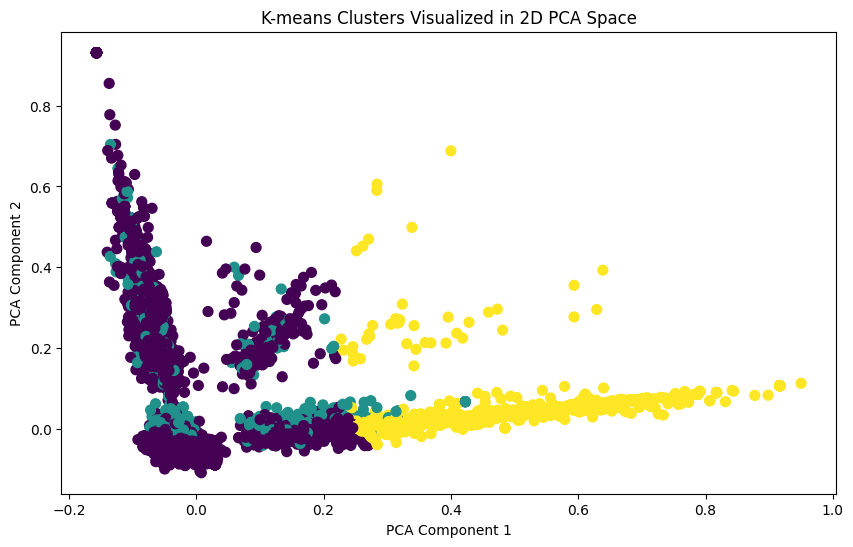

In [13]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Adding PCA components to the dataframe for visualization
train['pca1'] = X_pca[:, 0]
train['pca2'] = X_pca[:, 1]

# Plotting the clusters in the reduced PCA space
plt.figure(figsize=(10, 6))
plt.scatter(train['pca1'], train['pca2'], c=train['kmeans_cluster'], cmap='viridis', s=50)
plt.title("K-means Clusters Visualized in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### Model Evaluation and Discussion

Purpose:
We evaluate the clustering results and provide insights into the clustering structures observed. Additionally, we compare the performance of K-means and hierarchical clustering and discuss the limitations of each approach.


### Discussion:

- **K-means Clustering**: K-means performed well in identifying clusters of tweets. The clusters have clear separation, as observed in the PCA plot. However, K-means assumes that clusters are spherical and evenly sized, which may not always hold true for textual data.
  
- **Hierarchical Clustering**: Hierarchical clustering provides a more flexible structure, allowing us to visualize the relationship between clusters. It can reveal more nuanced structures than K-means, especially for non-spherical clusters. However, it is computationally more expensive and can be slow for large datasets.

- **Dimensionality Reduction (PCA)**: The PCA visualization allows us to inspect how well the clusters are separated in a reduced two-dimensional space. This helps confirm that the clusters identified by K-means have meaningful separation based on the tweet content.

### Conclusion:

Both K-means and hierarchical clustering were useful for exploring the latent structures within the tweet data. K-means offers faster performance and clear clustering, while hierarchical clustering provides more flexibility in detecting complex relationships between clusters. For further analysis, other clustering techniques like DBSCAN could be explored, and model tuning can improve the quality of clustering.


In [14]:
import pandas as pd

# Assuming `test.csv` has a similar structure to `train.csv`
test = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')

# Predicting with a trained model (placeholder for your prediction logic)
# For example, using the clustering model's labels (this is just a placeholder logic)
# You would replace this with the actual logic to select the word or phrase for each tweet
test['predicted_selected_text'] = test['text'].apply(lambda x: "sample prediction")  # Replace this with your actual predictions

# Creating the submission DataFrame
submission = pd.DataFrame({
    'textID': test['textID'],
    'selected_text': test['predicted_selected_text']  # Replace with the actual predicted text or phrase
})

# Saving the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
